In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df = pd.read_csv(r"C:\Users\hb292\Downloads\social_ads.csv")
df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


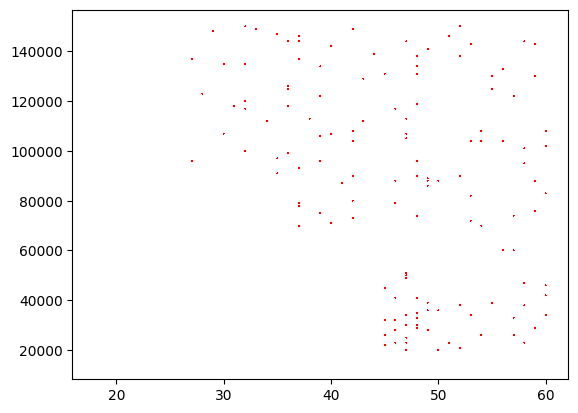

In [4]:
plt.scatter(df.Age, df.EstimatedSalary,df.Purchased, marker='+', color='red')

In [5]:
df.shape

(400, 3)

In [6]:
from sklearn.model_selection import train_test_split
X = df[['Age', 'EstimatedSalary']]
y = df.Purchased
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_test

,Age,EstimatedSalary
179,31,34000
327,42,75000
302,37,137000
354,36,99000
46,25,79000
...,...,...
106,26,35000
252,48,134000
52,29,83000
206,55,130000


In [8]:
y_test

179    0
327    0
302    1
354    1
46     0
      ..
106    0
252    1
52     0
206    1
35     0
Name: Purchased, Length: 80, dtype: int64

In [9]:
X_train

,Age,EstimatedSalary
27,47,30000
24,46,23000
2,26,43000
121,37,72000
6,27,84000
...,...,...
330,38,51000
279,50,36000
307,47,113000
219,59,143000


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [13]:
model.score(X_test, y_test)

0.825

In [14]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)


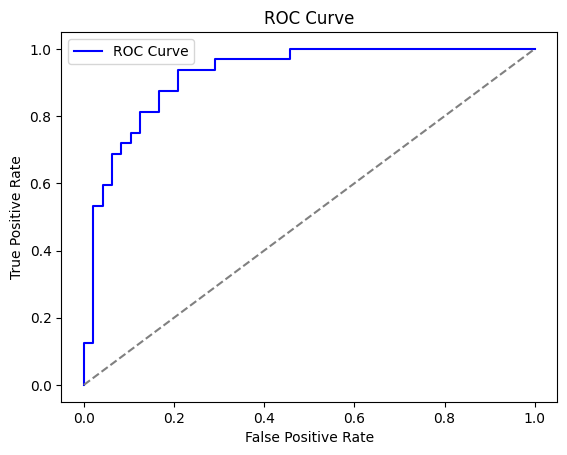

In [15]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [16]:
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

AUC Score: 0.9225260416666667
